In [ ]:
import numpy as np # Para funciones matemáticas.
import matplotlib.pyplot as plt # Para graficar.
from scipy.special import * # De aquí usaremos la función lambertw() para la función W de Lambert.
import networkx as nx #Para trabajar con grafos.
from scipy.optimize import fsolve #Para resolver el sistema al final.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


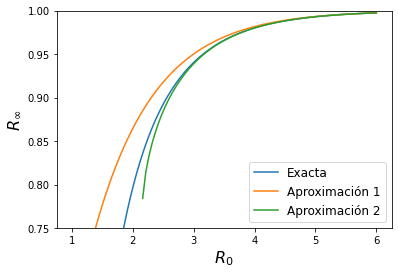

In [ ]:
def e(R0): # Definimos el final size exacto (usando la función W de Lambert) en función de R_0 y asumiendo S_0 = 1.
  return 1 + lambertw(-R0*np.exp(-R0))/R0
def a1(R0): # Definimos la primera aproximación (aproximando la función W de Lambert por su argumento) del final size en función de R_0 y asumiendo S_0 = 1.
  return 1 - np.exp(-R0)
def a2(R0): # Definimos la segunda aproximación (aproximando la exponencial de x por 1 + x) del final size en función de R_0 y asumiendo S_0 = 1.
  return 1 - (1/2 - np.sqrt(1/4 - R0*np.exp(-R0)))/R0

R0 = np.linspace(1.0, 6.0, 100) # Definimos un rango para valores de R_0 (evitando valores < 1).

# Ponemos todo en una sola gráfica.
fig, ax = plt.subplots()
plt.ylim(0.75, 1.0) # Nos limitamos a valores del final size > 0.75 para ver más claramente la separación y dónde las aproximaciones son más correctas.
ax.plot(R0, e(R0), label="Exacta")
ax.plot(R0, a1(R0), label="Aproximación 1")
ax.plot(R0, a2(R0), label="Aproximación 2")
ax.set_xlabel("$R_0$", fontsize=16)
ax.set_ylabel("$R_\infty$", fontsize=16)
ax.legend(fontsize=12, loc=4)
plt.savefig("fig.png", bbox_inches="tight", pad_inches=0.2)

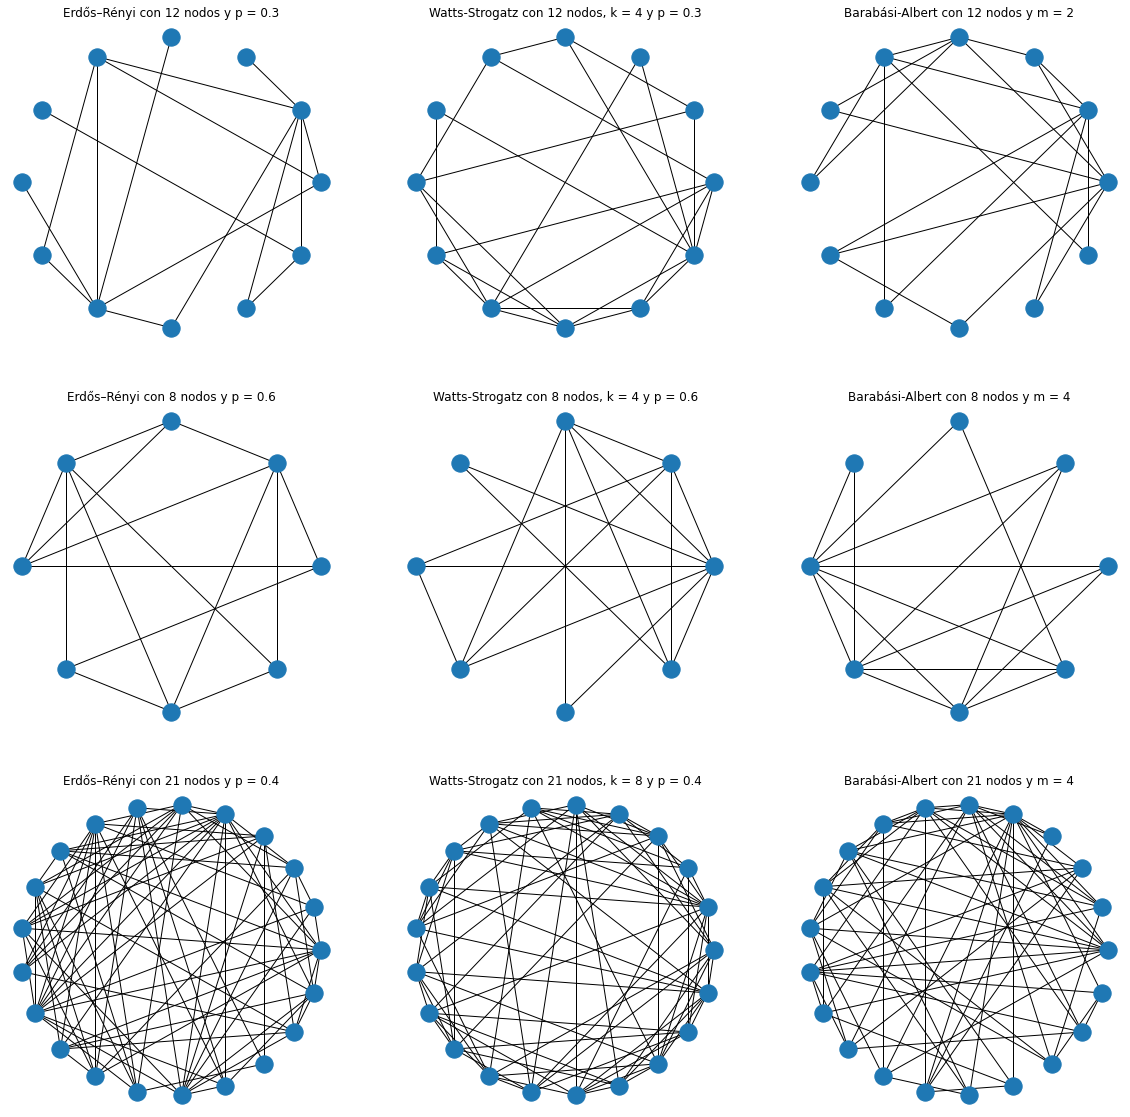

In [ ]:
# Generamos grafos aleatorios de los 3 tipos con distintos valores de los parametros y seed=2248.
G11 = nx.erdos_renyi_graph(12, 0.3, seed=2248)
G12 = nx.watts_strogatz_graph(12, 4, 0.3, seed=2248)
G13 = nx.barabasi_albert_graph(12, 2, seed=2248)
G21 = nx.erdos_renyi_graph(8, 0.6, seed=2248)
G22 = nx.watts_strogatz_graph(8, 4, 0.6, seed=2248)
G23 = nx.barabasi_albert_graph(8, 4, seed=2248)
G31 = nx.erdos_renyi_graph(21, 0.4, seed=2248)
G32 = nx.watts_strogatz_graph(21, 8, 0.4, seed=2248)
G33 = nx.barabasi_albert_graph(21, 4, seed=2248)

# Graficamos todos los grafos generados anteriormente.
plt.figure(figsize=(20, 20))
plt.subplot(331).set_title('Erdős–Rényi con 12 nodos y p = 0.3')
nx.draw(G11, pos=nx.circular_layout(G11))
plt.subplot(332).set_title('Watts-Strogatz con 12 nodos, k = 4 y p = 0.3')
nx.draw(G12, pos=nx.circular_layout(G12))
plt.subplot(333).set_title('Barabási-Albert con 12 nodos y m = 2')
nx.draw(G13, pos=nx.circular_layout(G13))
plt.subplot(334).set_title('Erdős–Rényi con 8 nodos y p = 0.6')
nx.draw(G21, pos=nx.circular_layout(G21))
plt.subplot(335).set_title('Watts-Strogatz con 8 nodos, k = 4 y p = 0.6')
nx.draw(G22, pos=nx.circular_layout(G22))
plt.subplot(336).set_title('Barabási-Albert con 8 nodos y m = 4')
nx.draw(G23, pos=nx.circular_layout(G23))
plt.subplot(337).set_title('Erdős–Rényi con 21 nodos y p = 0.4')
nx.draw(G31, pos=nx.circular_layout(G31))
plt.subplot(338).set_title('Watts-Strogatz con 21 nodos, k = 8 y p = 0.4')
nx.draw(G32, pos=nx.circular_layout(G32))
plt.subplot(339).set_title('Barabási-Albert con 21 nodos y m = 4')
nx.draw(G33, pos=nx.circular_layout(G33))

In [ ]:
def Rinf(x, R0, S0, A): # Definimos la función que arroja el sistema que deben satisfacer los final sizes.
  fsizes = []

  nrow,ncol = np.shape(A)

  for k in range(0,nrow):
    fsizek = x[k] - 1 + S0*np.exp(-R0*np.ravel(np.dot(A,x))[k])
    fsizes.append(fsizek)

  return np.array(fsizes)

def FinSize(R0, S0, A): # Definimos la función que resuelve el sistema dado un R0 y una matriz de adyacencia para hallar el final size total.
  n,_ = np.shape(A)
  x0 = np.full(n, 0.8)

  Rinfs = fsolve(Rinf, x0, (R0, S0, A))

  return np.sum(Rinfs)/n

def appRinf(x, R0, S0, A): # Definimos la función que arroja el sistema aproximado que deben satisfacer los final sizes.
  fsizes = []

  nrow,ncol = np.shape(A)

  for k in range(0,nrow):
    fsizek = x[k] - 1 + S0 - S0*R0*np.ravel(np.dot(A,x))[k]
    fsizes.append(fsizek)

  return np.array(fsizes)

def appFinSize(R0, S0, A): # Definimos la función que resuelve el sistema aproximado dado un R0 y una matriz de adyacencia para hallar el final size total.
  n,_ = np.shape(A)
  x0 = np.full(n, 0.8)

  Rinfs = fsolve(appRinf, x0, (R0, S0, A))

  return np.sum(Rinfs)/n

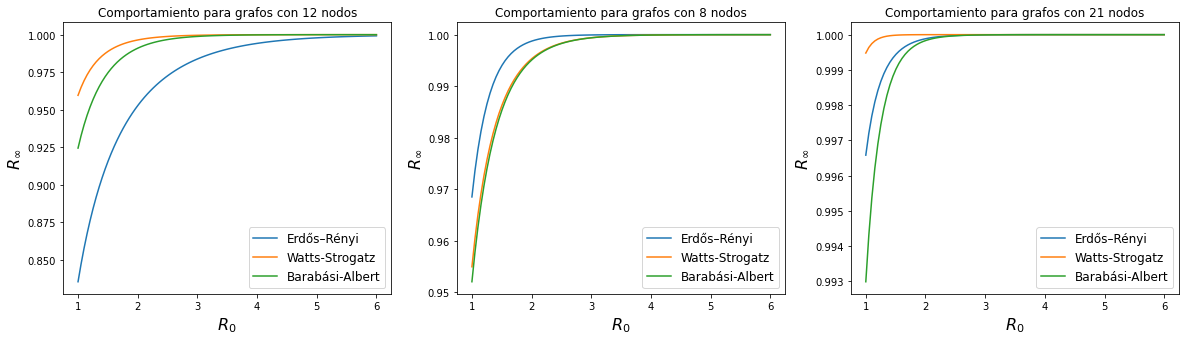

In [ ]:
# Obtenemos la matriz de adyacencia para cada uno de los grafos construidos anteriormente.
A11 = nx.to_numpy_matrix(G11)
A12 = nx.to_numpy_matrix(G12)
A13 = nx.to_numpy_matrix(G13)
A21 = nx.to_numpy_matrix(G21)
A22 = nx.to_numpy_matrix(G22)
A23 = nx.to_numpy_matrix(G23)
A31 = nx.to_numpy_matrix(G31)
A32 = nx.to_numpy_matrix(G32)
A33 = nx.to_numpy_matrix(G33)

S0 = 0.94 # Definimos un S0 razonable.
R0 = np.linspace(1.0, 6.0, 100) # Definimos un rango para valores de R_0 (evitando valores < 1).
sol11 = np.array([FinSize(R, S0, A11) for R in R0]) # Calculamos los final sizes dado el grafo de Erdős–Rényi con 12 nodos.
sol12 = np.array([FinSize(R, S0, A12) for R in R0]) # Calculamos los final sizes dado el grafo de Watts-Strogatz con 12 nodos.
sol13 = np.array([FinSize(R, S0, A13) for R in R0]) # Calculamos los final sizes dado el grafo de Barabási-Albert con 12 nodos.
sol21 = np.array([FinSize(R, S0, A21) for R in R0]) # Calculamos los final sizes dado el grafo de Erdős–Rényi con 8 nodos.
sol22 = np.array([FinSize(R, S0, A22) for R in R0]) # Calculamos los final sizes dado el grafo de Watts-Strogatz con 8 nodos.
sol23 = np.array([FinSize(R, S0, A23) for R in R0]) # Calculamos los final sizes dado el grafo de Barabási-Albert con 8 nodos.
sol31 = np.array([FinSize(R, S0, A31) for R in R0]) # Calculamos los final sizes dado el grafo de Erdős–Rényi con 21 nodos.
sol32 = np.array([FinSize(R, S0, A32) for R in R0]) # Calculamos los final sizes dado el grafo de Watts-Strogatz con 21 nodos.
sol33 = np.array([FinSize(R, S0, A33) for R in R0]) # Calculamos los final sizes dado el grafo de Barabási-Albert con 21 nodos.

# Ponemos todas las curvas para un mismo número de nodos en una sola gráfica.
plt.figure(figsize=(20, 5))
plt.subplot(131).set_title("Comportamiento para grafos con 12 nodos")
plt.plot(R0, sol11, label="Erdős–Rényi")
plt.plot(R0, sol12, label="Watts-Strogatz")
plt.plot(R0, sol13, label="Barabási-Albert")
plt.xlabel("$R_0$", fontsize=16)
plt.ylabel("$R_\infty$", fontsize=16)
plt.legend(fontsize=12, loc=4)
plt.subplot(132).set_title("Comportamiento para grafos con 8 nodos")
plt.plot(R0, sol21, label="Erdős–Rényi")
plt.plot(R0, sol22, label="Watts-Strogatz")
plt.plot(R0, sol23, label="Barabási-Albert")
plt.xlabel("$R_0$", fontsize=16)
plt.ylabel("$R_\infty$", fontsize=16)
plt.legend(fontsize=12, loc=4)
plt.subplot(133).set_title("Comportamiento para grafos con 21 nodos")
plt.plot(R0, sol31, label="Erdős–Rényi")
plt.plot(R0, sol32, label="Watts-Strogatz")
plt.plot(R0, sol33, label="Barabási-Albert")
plt.xlabel("$R_0$", fontsize=16)
plt.ylabel("$R_\infty$", fontsize=16)
plt.legend(fontsize=12, loc=4)

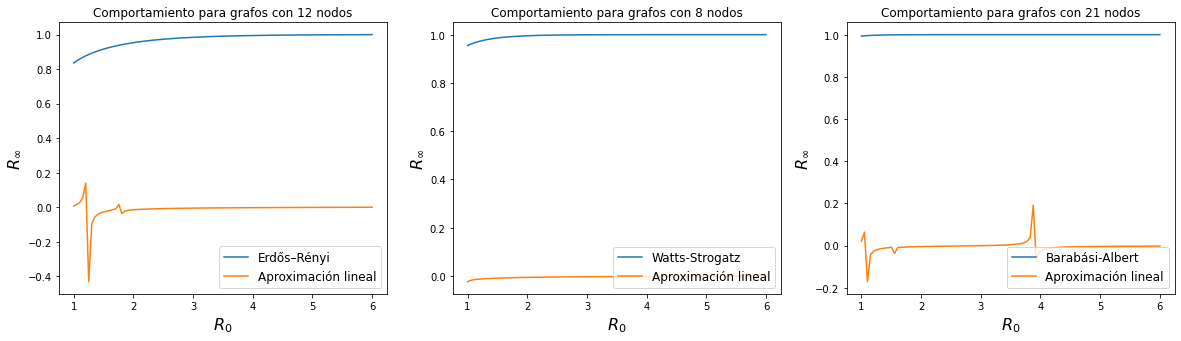

In [ ]:
FinSize(4.8, S0, A11)
appFinSize(3, S0, A11) # Aproximación falla dado que solo es válida para x << 1.

appsol1 = np.array([appFinSize(R, S0, A11) for R in R0]) # Calculamos los final sizes aproximados dado el grafo de Erdős–Rényi con 12 nodos.
appsol2 = np.array([appFinSize(R, S0, A22) for R in R0]) # Calculamos los final sizes aproximados dado el grafo de Watts-Strogatz con 8 nodos.
appsol3 = np.array([appFinSize(R, S0, A33) for R in R0]) # Calculamos los final sizes aproximados dado el grafo de Barabási-Albert con 21 nodos.

# Ponemos todas las curvas para un mismo número de nodos en una sola gráfica.
plt.figure(figsize=(20, 5))
plt.subplot(131).set_title("Comportamiento para grafos con 12 nodos")
plt.plot(R0, sol11, label="Erdős–Rényi")
plt.plot(R0, appsol1, label="Aproximación lineal")
plt.xlabel("$R_0$", fontsize=16)
plt.ylabel("$R_\infty$", fontsize=16)
plt.legend(fontsize=12, loc=4)
plt.subplot(132).set_title("Comportamiento para grafos con 8 nodos")
plt.plot(R0, sol22, label="Watts-Strogatz")
plt.plot(R0, appsol2, label="Aproximación lineal")
plt.xlabel("$R_0$", fontsize=16)
plt.ylabel("$R_\infty$", fontsize=16)
plt.legend(fontsize=12, loc=4)
plt.subplot(133).set_title("Comportamiento para grafos con 21 nodos")
plt.plot(R0, sol33, label="Barabási-Albert")
plt.plot(R0, appsol3, label="Aproximación lineal")
plt.xlabel("$R_0$", fontsize=16)
plt.ylabel("$R_\infty$", fontsize=16)
plt.legend(fontsize=12, loc=4)